# EDA,FE 스터디_한지영_2021.01.27

<br>
<div> 데이터 출처: https://www.dacon.io/competitions/official/235687/data/  </div>
<p> EDA는 https://www.dacon.io/competitions/official/235687/codeshare/2299?page=1&dtype=recent&ptype=pub 코드 돌려보며 코드와 데이터를 먼저 이해하고 FE 할 예정 </p>

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

# from tqdm import tqdm
# import gc
# import random
# import lightgbm as lgb
# import re
# from sklearn.metrics import *
# from sklearn.model_selection import KFold
# import warnings
# warnings.filterwarnings(action='ignore')

In [6]:
PATH = './data/'
train_err  = pd.read_csv(PATH+'train_err_data.csv')
train_quality  = pd.read_csv(PATH+'train_quality_data.csv')

test_err  = pd.read_csv(PATH+'test_err_data.csv')
test_quality  = pd.read_csv(PATH+'test_quality_data.csv')

In [7]:
# train_err
print("-- Size -- ")
print(f"train_err : {train_err.shape}")
print(f"test_err  : {test_err.shape}")

-- Size -- 
train_err : (16554663, 6)
test_err  : (16532648, 6)


In [9]:
# Train-set에만 있는 칼럼은?
print(train_err.columns.difference( test_err.columns ))
print(train_quality.columns.difference( test_quality.columns ))

Index([], dtype='object')
Index([], dtype='object')


In [11]:
display(train_err.head(2))
display(train_err.tail(2))
display(test_err.head(2))
display(test_err.tail(2))

,user_id,time,model_nm,fwver,errtype,errcode
0,10000,20201101025616,model_3,05.15.2138,15,1
1,10000,20201101030309,model_3,05.15.2138,12,1


,user_id,time,model_nm,fwver,errtype,errcode
16554661,24999,20201130172631,model_3,05.15.2138,4,0
16554662,24999,20201130210625,model_3,05.15.2138,15,1


,user_id,time,model_nm,fwver,errtype,errcode
0,30000,20201101030227,model_1,04.16.3553,31,1
1,30000,20201101030227,model_1,04.16.3553,33,2


,user_id,time,model_nm,fwver,errtype,errcode
16532646,44998,20201130212259,model_1,04.16.3553,16,1
16532647,44998,20201130212316,model_1,04.16.3553,31,0


In [12]:
# train_err / test_err의 user_id는?
display("train_err", train_err['user_id'].agg(['min','max']) )
print(f'Size : {len(train_err)}')

print('='* 80)

display("test_err",  test_err['user_id'].agg(['min','max']) )
print(f'Size : {len(test_err)}')

'train_err'

min    10000
max    24999
Name: user_id, dtype: int64

Size : 16554663


'test_err'

min    30000
max    44998
Name: user_id, dtype: int64

Size : 16532648


In [13]:
# train_err / test_err 의 time는?
display("train_err",  train_err['time'].agg(['min','max']) )
print(f'Size : {len(train_err)}')

print('='* 80)

display("test_err",  test_err['time'].agg(['min','max']) )
print(f'Size : {len(test_err)}')

'train_err'

min    20201031235959
max    20201202185152
Name: time, dtype: int64

Size : 16554663


'test_err'

min    20201031235959
max    20201214120118
Name: time, dtype: int64

Size : 16532648


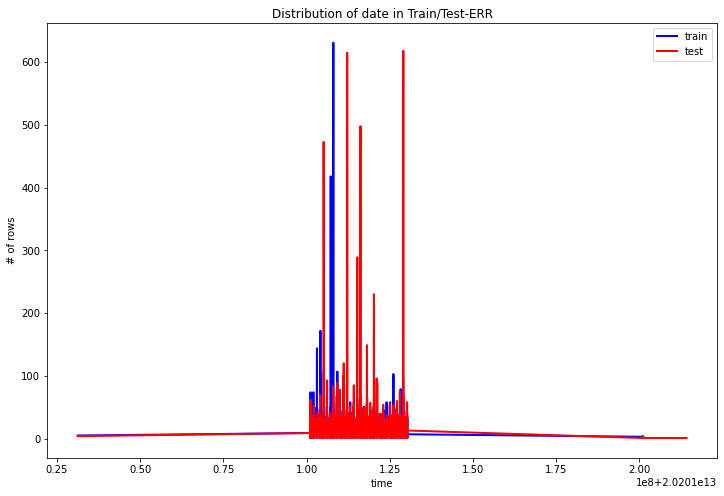

In [14]:
# train_err / test_err - time
# Figure을 정의
plt.figure(figsize = (12,8))

# Train/Test-set 각각에서 특정 date가 몇 번 등장했는지 시각화 시킴
train_err['time'].value_counts().sort_index().plot(color='b', lw=2, label='train')
test_err['time'].value_counts().sort_index().plot(color='r',  lw=2, label='test')

plt.legend()
plt.xlabel("time")
plt.ylabel("# of rows")
plt.title("Distribution of date in Train/Test-ERR");

In [9]:
# Train/Test-set의 고유한 user_id 구함.
train_err_errtype_set = set(train_err['user_id'])
test_err_errtype_set  = set(test_err['user_id'])


# Train/Test-set 고유한 user_id 개수를 구함.
print(f"Train-set에 있는 고유한 user_id 개수 : { len(train_err_errtype_set) }")
print(f"Test-set에 있는 고유한 user_id 개수 : { len(test_err_errtype_set) }")

# Train/Test-set 모두에 포함되어있는 user_id 구함.
print('='* 80)
common_errtype = train_err_errtype_set.intersection(test_err_errtype_set)
print(f"Train/Test-set에 공통으로 포함되어 있는 user_id 개수 : {len(common_errtype)}")

# Train-set에만 있는 user_id 구함.
print('='* 80)
only_train_err_errtype = train_err_errtype_set.difference(test_err_errtype_set)
print(f"Train-set에만 있는 user_id 총 { len(only_train_err_errtype) }개 입니다.")
#print(f"Train-set에만 있는 user_id : { sorted(only_train_err_errtype ) }")

# Test-set에만 있는 user_id 구함.
print('='* 80)
only_test_err_errtype = test_err_errtype_set.difference(train_err_errtype_set)
print(f"Test-set에만 있는 user_id 총 { len(only_test_err_errtype) }개 입니다.")
#print(f"Test-set에만 있는 user_id : { sorted( only_test_err_errtype ) }")

Train-set에 있는 고유한 user_id 개수 : 15000
Test-set에 있는 고유한 user_id 개수 : 14998
Train/Test-set에 공통으로 포함되어 있는 user_id 개수 : 0
Train-set에만 있는 user_id 총 15000개 입니다.
Test-set에만 있는 user_id 총 14998개 입니다.


In [10]:
# Train/Test-set의 고유한 model_nm 구함.
train_err_errtype_set = set(train_err['model_nm'])
test_err_errtype_set  = set(test_err['model_nm'])


# Train/Test-set 고유한 model_nm 개수를 구함.
print(f"Train-set에 있는 고유한 model_nm 개수 : { len(train_err_errtype_set) }")
print(f"Test-set에 있는 고유한 model_nm 개수 : { len(test_err_errtype_set) }")

# Train/Test-set 모두에 포함되어있는 model_nm 구함.
print('='* 80)
common_errtype = train_err_errtype_set.intersection(test_err_errtype_set)
print(f"Train/Test-set에 공통으로 포함되어 있는 model_nm 개수 : {len(common_errtype)}")

# Train-set에만 있는 model_nm 구함.
print('='* 80)
only_train_err_errtype = train_err_errtype_set.difference(test_err_errtype_set)
print(f"Train-set에만 있는 model_nm 총 { len(only_train_err_errtype) }개 입니다.")
print(f"Train-set에만 있는 model_nm : { sorted(only_train_err_errtype ) }")

# Test-set에만 있는 model_nm 구함.
print('='* 80)
only_test_err_errtype = test_err_errtype_set.difference(train_err_errtype_set)
print(f"Test-set에만 있는 model_nm 총 { len(only_test_err_errtype) }개 입니다.")
print(f"Test-set에만 있는 model_nm : { sorted( only_test_err_errtype ) }")

Train-set에 있는 고유한 model_nm 개수 : 9
Test-set에 있는 고유한 model_nm 개수 : 9
Train/Test-set에 공통으로 포함되어 있는 model_nm 개수 : 9
Train-set에만 있는 model_nm 총 0개 입니다.
Train-set에만 있는 model_nm : []
Test-set에만 있는 model_nm 총 0개 입니다.
Test-set에만 있는 model_nm : []


In [11]:
# Train/Test-set의 고유한 fwver 구함.
train_err_errtype_set = set(train_err['fwver'])
test_err_errtype_set  = set(test_err['fwver'])


# Train/Test-set 고유한 errtype의 개수를 구함.
print(f"Train-set에 있는 고유한 fwver 개수 : { len(train_err_errtype_set) }")
print(f"Test-set에 있는 고유한 fwver 개수 : { len(test_err_errtype_set) }")

# Train/Test-set 모두에 포함되어있는 errtype를 구함.
print('='* 80)
common_errtype = train_err_errtype_set.intersection(test_err_errtype_set)
print(f"Train/Test-set에 공통으로 포함되어 있는 fwver 개수 : {len(common_errtype)}")

# Train-set에만 있는 errtype를 구함.
print('='* 80)
only_train_err_errtype = train_err_errtype_set.difference(test_err_errtype_set)
print(f"Train-set에만 있는 fwver 총 { len(only_train_err_errtype) }개 입니다.")
print(f"Train-set에만 있는 fwver : { sorted(only_train_err_errtype ) }")

# Test-set에만 있는 errtype를 구함.
print('='* 80)
only_test_err_errtype = test_err_errtype_set.difference(train_err_errtype_set)
print(f"Test-set에만 있는 fwver 총 { len(only_test_err_errtype) }개 입니다.")
print(f"Test-set에만 있는 fwver : { sorted( only_test_err_errtype ) }")

Train-set에 있는 고유한 fwver 개수 : 37
Test-set에 있는 고유한 fwver 개수 : 40
Train/Test-set에 공통으로 포함되어 있는 fwver 개수 : 31
Train-set에만 있는 fwver 총 6개 입니다.
Train-set에만 있는 fwver : ['04.16.2641', '04.16.3345', '04.22.1442', '04.33.1095', '05.15.2090', '05.15.2122']
Test-set에만 있는 fwver 총 9개 입니다.
Test-set에만 있는 fwver : ['04.22.1170', '04.22.1448', '04.22.1478', '04.22.1608', '04.22.1772', '04.73.2569', '04.73.2577', '10.22.1770', '10.22.1780']


In [12]:
# Train/Test-set의 고유한 errtype 구함.
train_err_errtype_set = set(train_err['errtype'])
test_err_errtype_set  = set(test_err['errtype'])


# Train/Test-set 고유한 errtype의 개수를 구함.
print(f"Train-set에 있는 고유한 errtype의 개수 : { len(train_err_errtype_set) }")
print(f"Test-set에 있는 고유한 errtype의 개수 : { len(test_err_errtype_set) }")

# Train/Test-set 모두에 포함되어있는 errtype를 구함.
print('='* 80)
common_errtype = train_err_errtype_set.intersection(test_err_errtype_set)
print(f"Train/Test-set에 공통으로 포함되어 있는 errtype 개수 : {len(common_errtype)}")

# Train-set에만 있는 errtype를 구함.
print('='* 80)
only_train_err_errtype = train_err_errtype_set.difference(test_err_errtype_set)
print(f"Train-set에만 있는 errtype는 총 { len(only_train_err_errtype) }개 입니다.")
print(f"Train-set에만 있는 errtype는 : { sorted(only_train_err_errtype ) }")

# Test-set에만 있는 errtype를 구함.
print('='* 80)
only_test_err_errtype = test_err_errtype_set.difference(train_err_errtype_set)
print(f"Test-set에만 있는 errtype는 총 { len(only_test_err_errtype) }개 입니다.")
print(f"Test-set에만 있는 errtype는 : { sorted( only_test_err_errtype ) }")

Train-set에 있는 고유한 errtype의 개수 : 41
Test-set에 있는 고유한 errtype의 개수 : 41
Train/Test-set에 공통으로 포함되어 있는 errtype 개수 : 41
Train-set에만 있는 errtype는 총 0개 입니다.
Train-set에만 있는 errtype는 : []
Test-set에만 있는 errtype는 총 0개 입니다.
Test-set에만 있는 errtype는 : []


In [13]:
# Train/Test-set의 고유한 errcode 구함.
train_err_errtype_set = set(train_err['errcode'])
test_err_errtype_set  = set(test_err['errcode'])


# Train/Test-set 고유한 errcode 개수를 구함.
print(f"Train-set에 있는 고유한 errcode 개수 : { len(train_err_errtype_set) }")
print(f"Test-set에 있는 고유한 errcode 개수 : { len(test_err_errtype_set) }")

# Train/Test-set 모두에 포함되어있는 errcode 구함.
print('='* 80)
common_errtype = train_err_errtype_set.intersection(test_err_errtype_set)
print(f"Train/Test-set에 공통으로 포함되어 있는 errcode 개수 : {len(common_errtype)}")

# Train-set에만 있는 errcode 구함.
print('='* 80)
only_train_err_errtype = train_err_errtype_set.difference(test_err_errtype_set)
print(f"Train-set에만 있는 errcode 총 { len(only_train_err_errtype) }개 입니다.")
#print(f"Train-set에만 있는 errcode : { sorted(only_train_err_errtype ) }")

# Test-set에만 있는 errcode 구함.
print('='* 80)
only_test_err_errtype = test_err_errtype_set.difference(train_err_errtype_set)
print(f"Test-set에만 있는 errcode 총 { len(only_test_err_errtype) }개 입니다.")
#print(f"Test-set에만 있는 errcode : { sorted( only_test_err_errtype ) }")

Train-set에 있는 고유한 errcode 개수 : 2806
Test-set에 있는 고유한 errcode 개수 : 2956
Train/Test-set에 공통으로 포함되어 있는 errcode 개수 : 1408
Train-set에만 있는 errcode 총 1398개 입니다.
Test-set에만 있는 errcode 총 1548개 입니다.


In [17]:
#간단히 err/quality 데이터 살피면
display(train_err.describe())
display(train_quality.describe())

,user_id,time,errtype
count,1.655466e+07,1.655466e+07,1.655466e+07
mean,1.758495e+04,2.020112e+13,2.128030e+01
std,4.341885e+03,8.664375e+06,9.943175e+00
min,1.000000e+04,2.020103e+13,1.000000e+00
25%,1.392500e+04,2.020111e+13,1.500000e+01
50%,1.748500e+04,2.020112e+13,2.300000e+01
75%,2.122700e+04,2.020112e+13,3.100000e+01
max,2.499900e+04,2.020120e+13,4.200000e+01


,time,user_id,quality_0,quality_1,quality_2,quality_3,quality_4,quality_6,quality_11,quality_12
count,8.286240e+05,828624.000000,684192.000000,828624.000000,788511.000000,828624.0,828624.0,828624.000000,828624.000000,828624.000000
mean,2.020112e+13,17574.678315,4.148701,-0.171782,4.751094,0.0,0.0,2.043391,-0.181638,0.045878
std,8.863638e+06,4374.113554,479.315029,0.692386,586.252469,0.0,0.0,32.695380,0.397767,0.302452
min,2.020103e+13,10000.000000,-1.000000,-1.000000,-1.000000,0.0,0.0,-1.000000,-1.000000,0.000000
25%,2.020111e+13,13685.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
50%,2.020112e+13,17597.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
75%,2.020112e+13,21423.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
max,2.020113e+13,24997.000000,157667.000000,171.000000,191859.000000,0.0,0.0,600.000000,14.000000,14.000000



# 시각화


# errdata

In [26]:
train_err.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16554663 entries, 0 to 16554662
Data columns (total 6 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   user_id   int64 
 1   time      int64 
 2   model_nm  object
 3   fwver     object
 4   errtype   int64 
 5   errcode   object
dtypes: int64(3), object(3)
memory usage: 757.8+ MB


## errdata - userid

<AxesSubplot:xlabel='user_id'>

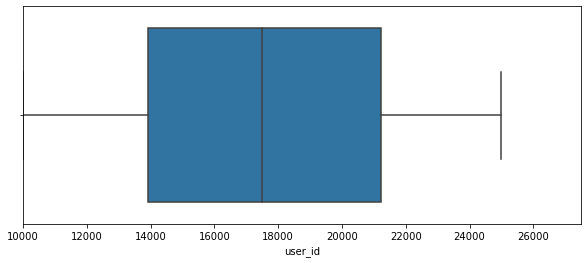

In [19]:
plt.figure(figsize=(10,4))
plt.xlim(train_err.user_id.min(), train_err.user_id.max()*1.1)
sns.boxplot(x=train_err.user_id)

## errdata - time

Text(0.5, 1.0, 'type Values in the Training Set - train ()')

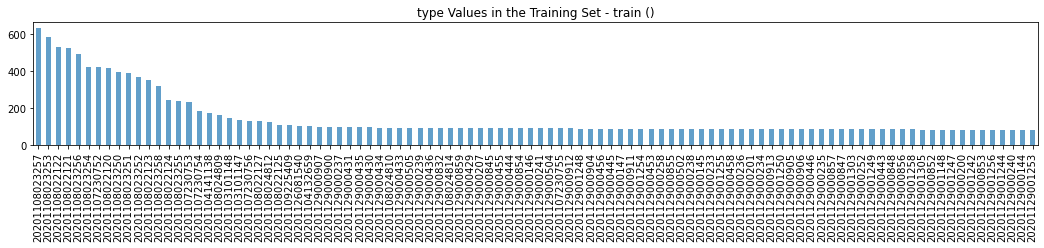

In [20]:
# time
fig = plt.figure(figsize=(18,9))
plt.subplots_adjust(hspace=.5)

plt.subplot2grid((3,3), (0,0), colspan = 3)
train_err['time'].value_counts()[:100].plot(kind='bar', alpha=0.7)
plt.title('type Values in the Training Set - train ()')

## errdata - modelnm

Text(0.5, 1.0, 'type Values in the Training Set - train ()')

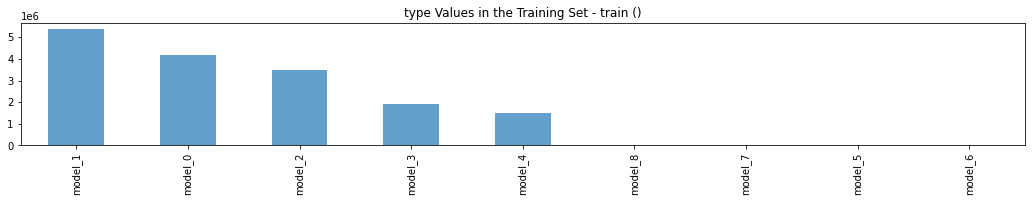

In [21]:
# model_nm
fig = plt.figure(figsize=(18,9))
plt.subplots_adjust(hspace=.5)

plt.subplot2grid((3,3), (0,0), colspan = 3)
train_err['model_nm'].value_counts()[:100].plot(kind='bar', alpha=0.7)
plt.title('type Values in the Training Set - train ()')

## errdata - fwver

Text(0.5, 1.0, 'type Values in the Training Set - train ()')

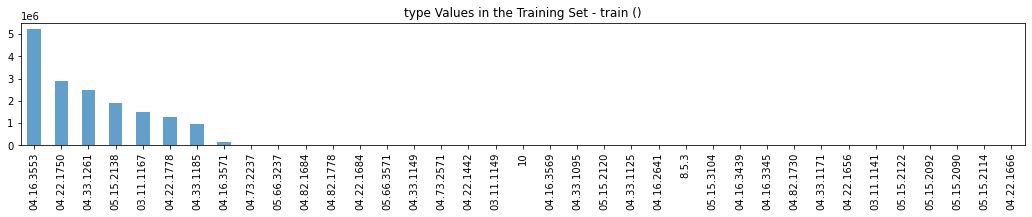

In [22]:
# fwver
fig = plt.figure(figsize=(18,9))
plt.subplots_adjust(hspace=.5)

plt.subplot2grid((3,3), (0,0), colspan = 3)
train_err['fwver'].value_counts()[:100].plot(kind='bar', alpha=0.7)
plt.title('type Values in the Training Set - train ()')

## errdata - errtype

Text(0.5, 1.0, 'type Values in the Training Set - train ()')

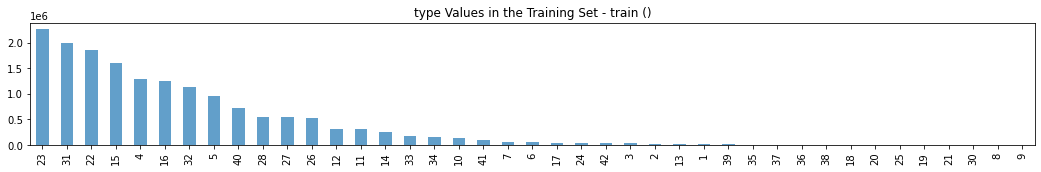

In [23]:
# errtype
fig = plt.figure(figsize=(18,9))
plt.subplots_adjust(hspace=.5)

plt.subplot2grid((3,3), (0,0), colspan = 3)
train_err['errtype'].value_counts()[:100].plot(kind='bar', alpha=0.7)
plt.title('type Values in the Training Set - train ()')

## errdata - errcode

Text(0.5, 1.0, 'type Values in the Training Set - train ()')

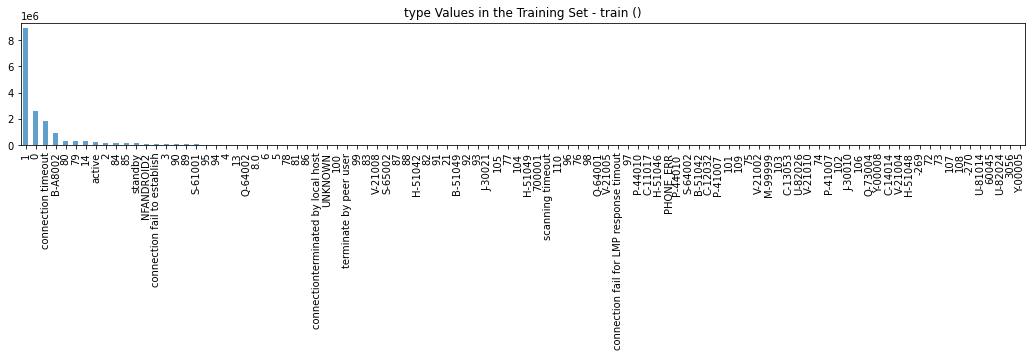

In [24]:
# errcode
fig = plt.figure(figsize=(18,9))
plt.subplots_adjust(hspace=.5)

plt.subplot2grid((3,3), (0,0), colspan = 3)
train_err['errcode'].value_counts()[:100].plot(kind='bar', alpha=0.7)
plt.title('type Values in the Training Set - train ()')

# qualitydata

In [27]:
train_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828624 entries, 0 to 828623
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   time        828624 non-null  int64  
 1   user_id     828624 non-null  int64  
 2   fwver       788544 non-null  object 
 3   quality_0   684192 non-null  float64
 4   quality_1   828624 non-null  int64  
 5   quality_2   788511 non-null  float64
 6   quality_3   828624 non-null  int64  
 7   quality_4   828624 non-null  int64  
 8   quality_5   828604 non-null  object 
 9   quality_6   828624 non-null  int64  
 10  quality_7   828624 non-null  object 
 11  quality_8   828624 non-null  object 
 12  quality_9   828624 non-null  object 
 13  quality_10  828624 non-null  object 
 14  quality_11  828624 non-null  int64  
 15  quality_12  828624 non-null  int64  
dtypes: float64(2), int64(8), object(6)
memory usage: 101.2+ MB


## qualitydata-time

Text(0.5, 1.0, 'type Values in the Training Set - train ()')

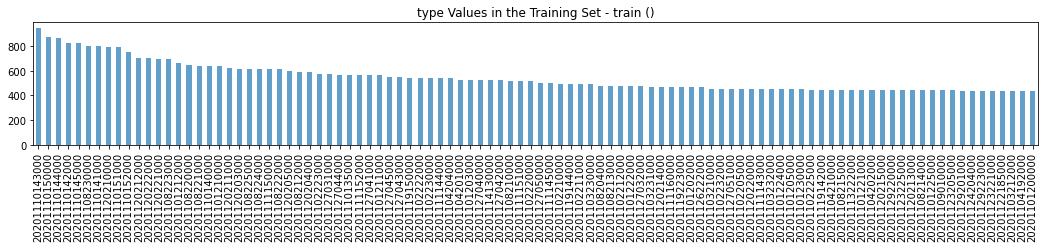

In [28]:
# time
fig = plt.figure(figsize=(18,9))
plt.subplots_adjust(hspace=.5)

plt.subplot2grid((3,3), (0,0), colspan = 3)
train_quality['time'].value_counts()[:100].plot(kind='bar', alpha=0.7)
plt.title('type Values in the Training Set - train ()')

## qualitydata-user_id

Text(0.5, 1.0, 'type Values in the Training Set - train ()')

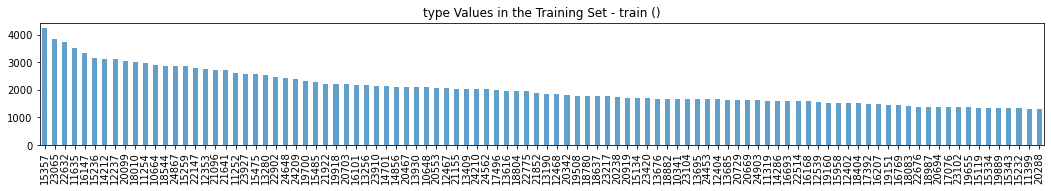

In [29]:
# user_id
fig = plt.figure(figsize=(18,9))
plt.subplots_adjust(hspace=.5)

plt.subplot2grid((3,3), (0,0), colspan = 3)
train_quality['user_id'].value_counts()[:100].plot(kind='bar', alpha=0.7)
plt.title('type Values in the Training Set - train ()')

## qualitydata-fwver

Text(0.5, 1.0, 'type Values in the Training Set - train ()')

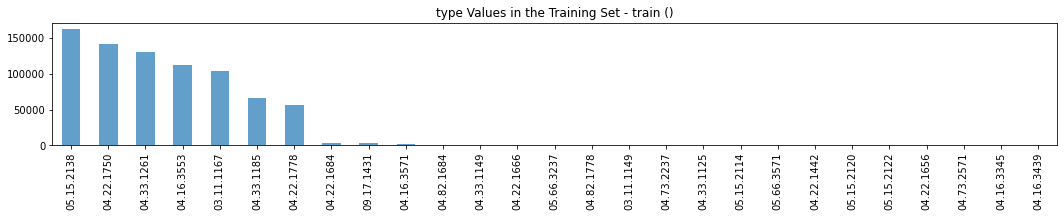

In [30]:
# fwver
fig = plt.figure(figsize=(18,9))
plt.subplots_adjust(hspace=.5)

plt.subplot2grid((3,3), (0,0), colspan = 3)
train_quality['fwver'].value_counts()[:100].plot(kind='bar', alpha=0.7)
plt.title('type Values in the Training Set - train ()')

## qualitydata-quality_0

Text(0.5, 1.0, 'type Values in the Training Set - train ()')

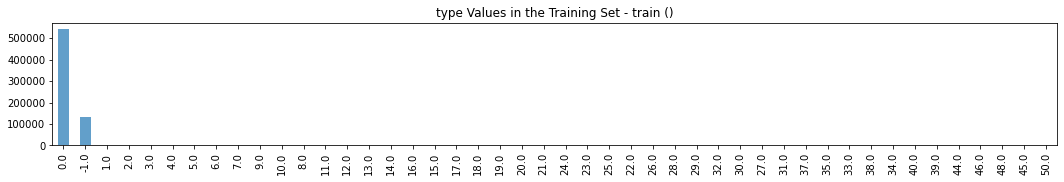

In [31]:
# qualiry_0
fig = plt.figure(figsize=(18,9))
plt.subplots_adjust(hspace=.5)

plt.subplot2grid((3,3), (0,0), colspan = 3)
train_quality['quality_0'].value_counts()[:50].plot(kind='bar', alpha=0.7)
plt.title('type Values in the Training Set - train ()')

## qualitydata-quality_1

Text(0.5, 1.0, 'type Values in the Training Set - train ()')

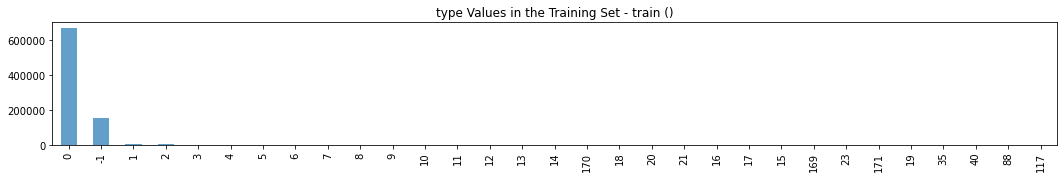

In [32]:

# quality_1
fig = plt.figure(figsize=(18,9))
plt.subplots_adjust(hspace=.5)

plt.subplot2grid((3,3), (0,0), colspan = 3)
train_quality['quality_1'].value_counts()[:50].plot(kind='bar', alpha=0.7)
plt.title('type Values in the Training Set - train ()')

## qualitydata-quality_2

Text(0.5, 1.0, 'type Values in the Training Set - train ()')

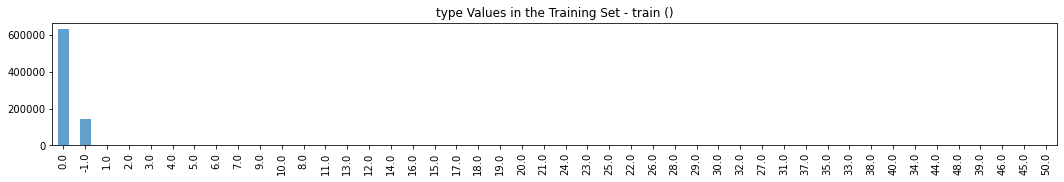

In [33]:
# quality_2
fig = plt.figure(figsize=(18,9))
plt.subplots_adjust(hspace=.5)

plt.subplot2grid((3,3), (0,0), colspan = 3)
train_quality['quality_2'].value_counts()[:50].plot(kind='bar', alpha=0.7)
plt.title('type Values in the Training Set - train ()')

# ----------------------------------------------------------------------------------------
#                                                   FE
# ----------------------------------------------------------------------------------------

# 결측치

In [40]:
# Missing Value 확인
print("Train-set")
display( train_err.isnull().sum() )

print('=' * 80)

print("Test-set")
display( test_err.isnull().sum() )

Train-set


user_id     0
time        0
model_nm    0
fwver       0
errtype     0
errcode     1
dtype: int64

Test-set


user_id     0
time        0
model_nm    0
fwver       0
errtype     0
errcode     4
dtype: int64

In [41]:
# Missing Value 확인
print("Train-set")
display( train_quality.isnull().sum() )

print('=' * 80)

print("Test-set")
display( test_quality.isnull().sum() )

Train-set


time               0
user_id            0
fwver          40080
quality_0     144432
quality_1          0
quality_2      40113
quality_3          0
quality_4          0
quality_5         20
quality_6          0
quality_7          0
quality_8          0
quality_9          0
quality_10         0
quality_11         0
quality_12         0
dtype: int64

Test-set


time               0
user_id            0
fwver          22764
quality_0     106584
quality_1         11
quality_2      21115
quality_3          0
quality_4          0
quality_5         44
quality_6          0
quality_7          0
quality_8          0
quality_9          0
quality_10         0
quality_11         0
quality_12         0
dtype: int64

<br>
<span style="color:red; font-size:15pt"> 확인 결과 err data는 결측치 양이 너무 작아서 FE는 train_quality data 만 가지고 하겠습니당 </span>

In [15]:
train_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828624 entries, 0 to 828623
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   time        828624 non-null  int64  
 1   user_id     828624 non-null  int64  
 2   fwver       788544 non-null  object 
 3   quality_0   684192 non-null  float64
 4   quality_1   828624 non-null  int64  
 5   quality_2   788511 non-null  float64
 6   quality_3   828624 non-null  int64  
 7   quality_4   828624 non-null  int64  
 8   quality_5   828604 non-null  object 
 9   quality_6   828624 non-null  int64  
 10  quality_7   828624 non-null  object 
 11  quality_8   828624 non-null  object 
 12  quality_9   828624 non-null  object 
 13  quality_10  828624 non-null  object 
 14  quality_11  828624 non-null  int64  
 15  quality_12  828624 non-null  int64  
dtypes: float64(2), int64(8), object(6)
memory usage: 101.2+ MB


In [16]:
train_quality.shape

(828624, 16)

In [17]:
temp = train_quality.copy()

In [18]:
temp['fwver'].head()

0    05.15.2138
1    05.15.2138
2    05.15.2138
3    05.15.2138
4    05.15.2138
Name: fwver, dtype: object

In [19]:
temp['quality_5'].head()

0    0
1    0
2    0
3    0
4    0
Name: quality_5, dtype: object

In [20]:
temp['quality_7'].head()

0    0
1    0
2    0
3    0
4    0
Name: quality_7, dtype: object

In [21]:
temp['quality_8'].head()

0    0
1    0
2    0
3    0
4    0
Name: quality_8, dtype: object

In [56]:
temp['quality_9'].head()

0    0
1    0
2    0
3    0
4    0
Name: quality_9, dtype: object

In [57]:
temp['quality_10'].head()

0    4
1    4
2    4
3    4
4    4
Name: quality_10, dtype: object

<br>
<span style="color:red; font-size:15pt;"> quality의 dtype이 모두 같아야 한다고 생각. 그러나 quality 5,7,8,9,10 dtype: object. 왜 object값이 있을까? -> 일단 to_numeric 함수 사용 -> value error 발생 확인 </span>

In [90]:
temp['quality_5'] = temp['quality_5'].apply(pd.to_numeric)

ValueError: Unable to parse string "2,385" at position 0

In [92]:
temp['quality_5'].unique()

array(['0', '4', '8', ..., '98,175', '7,998', '9,558'], dtype=object)

<br>
<div style="color:red; font-size:30pt"> 1000단위 comma 없애고 다시 불러오자! </div>
<br>
<div style="color:blue; font-size:15pt"> => thousands 매개변수 이용 </div>

In [22]:
train_quality  = pd.read_csv(PATH+'train_quality_data.csv', thousands = ',')

In [23]:
temp = train_quality.copy()

In [24]:
temp['quality_5'].unique()

array([0.0000e+00, 4.0000e+00, 8.0000e+00, ..., 9.8175e+04, 7.9980e+03,
       9.5580e+03])

In [99]:
temp['quality_7'].unique()

array([   0,    2,   44,   87,   36,    4,  348,    9,    6,  283,    5,
         68,   49,   62,   75,   19,  418,   37, 1598,   24,   12,   46,
        110,    1,   78, 4789, 5285,   74,   30,  600,   47,   67,  105,
         25,   82,   92,  159,   72, 1603, 1280,  433,  109,   13,  111,
         98,  422,    3,  129,   51,  117,    7,   21,   15,   11,   10,
        178, 1200,   65,   56,   22,   42,   59,  210,  156,  574,  202,
        517,   33,   29,   14,    8,  328,   17,   77,   32,   81,   28,
         64,   41,   20,  132,   57,   55,   60,   85,   73,   39,   66,
        131,  112,   38,  617,  275,  199,  119,  198,  304,  788,  182,
       1274,  356,  765,   61,  530,  167,  381,   26,  264,   89, 1174,
       2162,   52,   18,  505, 3630, 2529, 2259,   27,  108,  123, 1209,
        242,   16,  443, 3000, 1027,   83,  139,   31, 1689,  267,   88,
        389,  714,  347, 1611, 2884, 1080,   43,  350, 1914,  162,  254,
         35,  196,   50,  102,   58, 1668,  179,  1

In [25]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828624 entries, 0 to 828623
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   time        828624 non-null  int64  
 1   user_id     828624 non-null  int64  
 2   fwver       788544 non-null  object 
 3   quality_0   684192 non-null  float64
 4   quality_1   828624 non-null  int64  
 5   quality_2   788511 non-null  float64
 6   quality_3   828624 non-null  int64  
 7   quality_4   828624 non-null  int64  
 8   quality_5   828604 non-null  float64
 9   quality_6   828624 non-null  int64  
 10  quality_7   828624 non-null  int64  
 11  quality_8   828624 non-null  int64  
 12  quality_9   828624 non-null  int64  
 13  quality_10  828624 non-null  int64  
 14  quality_11  828624 non-null  int64  
 15  quality_12  828624 non-null  int64  
dtypes: float64(3), int64(12), object(1)
memory usage: 101.2+ MB


## quality의 값 모두 float/int로 바뀐 것 확인함. 이제 결측치 처리!

In [26]:
temp.isnull().sum()

time               0
user_id            0
fwver          40080
quality_0     144432
quality_1          0
quality_2      40113
quality_3          0
quality_4          0
quality_5         20
quality_6          0
quality_7          0
quality_8          0
quality_9          0
quality_10         0
quality_11         0
quality_12         0
dtype: int64

In [27]:
temp['fwver'].unique()

array(['05.15.2138', '04.22.1750', '04.16.3553', '04.33.1261',
       '04.22.1778', '04.33.1185', '04.16.3571', '05.66.3571',
       '03.11.1149', '03.11.1167', '04.82.1684', '04.82.1778',
       '04.33.1149', nan, '05.66.3237', '04.73.2237', '09.17.1431',
       '04.22.1684', '05.15.2120', '04.33.1125', '05.15.2122',
       '04.22.1666', '04.22.1656', '04.16.3439', '04.73.2571',
       '05.15.2114', '04.16.3345', '04.22.1442'], dtype=object)

## fwver (펌웨어 버전) 결측치 처리 패스, quality_0,2,5 결측치 처리 필요

In [28]:
findrow_5 = temp.loc[(temp['quality_5'].isnull())]
findrow_5

,time,user_id,fwver,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
58907,20201128234000,11154,04.33.1261,0.0,0,0.0,0,0,NaN,0,0,0,0,200496,0,2
150490,20201126231000,12681,04.22.1778,0.0,0,0.0,0,0,NaN,0,11,0,0,843420,0,3
150491,20201126231000,12681,04.22.1778,0.0,0,0.0,0,0,NaN,0,11,0,0,843420,0,3
150502,20201127011000,12681,04.22.1778,0.0,0,0.0,0,0,NaN,0,0,0,0,1037689,0,0
150503,20201127011000,12681,04.22.1778,0.0,0,0.0,0,0,NaN,0,0,0,0,1037689,0,0
150527,20201127051000,12681,04.22.1778,0.0,0,0.0,0,0,NaN,0,0,0,0,631620,0,0
150538,20201127071000,12681,04.22.1778,0.0,0,0.0,0,0,NaN,0,0,0,0,1012799,0,0
150539,20201127071000,12681,04.22.1778,0.0,0,0.0,0,0,NaN,0,0,0,0,1012799,0,0
209696,20201122004000,13720,04.22.1750,0.0,0,0.0,0,0,NaN,0,0,0,0,1005588,0,0
209697,20201122004000,13720,04.22.1750,0.0,0,0.0,0,0,NaN,0,0,0,0,1005588,0,0


In [29]:
findrow_2 = temp.loc[(temp['quality_2'].isnull())]
findrow_2

,time,user_id,fwver,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
38316,20201120010000,10693,NaN,NaN,0,NaN,0,0,0.0,0,0,0,0,0,0,0
38317,20201120010000,10693,NaN,NaN,0,NaN,0,0,0.0,0,0,0,0,0,0,0
38318,20201120010000,10693,NaN,NaN,0,NaN,0,0,0.0,0,0,0,0,0,0,0
38319,20201120010000,10693,NaN,NaN,0,NaN,0,0,0.0,0,0,0,0,0,0,0
38320,20201120010000,10693,NaN,NaN,0,NaN,0,0,0.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828331,20201109232000,24982,NaN,NaN,0,NaN,0,0,0.0,0,0,0,0,0,0,0
828332,20201109232000,24982,NaN,NaN,0,NaN,0,0,0.0,0,0,0,0,0,0,0
828333,20201109232000,24982,NaN,NaN,-1,NaN,0,0,-1.0,-1,0,0,0,0,-1,0
828334,20201109232000,24982,NaN,NaN,-1,NaN,0,0,-1.0,-1,0,0,0,0,-1,0


In [30]:
findrow_0and2 = temp.loc[(temp['quality_0'].isnull())&(temp['quality_2'].isnull())]
findrow_0and2

,time,user_id,fwver,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
38316,20201120010000,10693,NaN,NaN,0,NaN,0,0,0.0,0,0,0,0,0,0,0
38317,20201120010000,10693,NaN,NaN,0,NaN,0,0,0.0,0,0,0,0,0,0,0
38318,20201120010000,10693,NaN,NaN,0,NaN,0,0,0.0,0,0,0,0,0,0,0
38319,20201120010000,10693,NaN,NaN,0,NaN,0,0,0.0,0,0,0,0,0,0,0
38320,20201120010000,10693,NaN,NaN,0,NaN,0,0,0.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828331,20201109232000,24982,NaN,NaN,0,NaN,0,0,0.0,0,0,0,0,0,0,0
828332,20201109232000,24982,NaN,NaN,0,NaN,0,0,0.0,0,0,0,0,0,0,0
828333,20201109232000,24982,NaN,NaN,-1,NaN,0,0,-1.0,-1,0,0,0,0,-1,0
828334,20201109232000,24982,NaN,NaN,-1,NaN,0,0,-1.0,-1,0,0,0,0,-1,0


In [135]:
findrow_0butnot2 = temp.loc[(temp['quality_2'].isnull())& ~(temp['quality_0'].isnull())]
findrow_0butnot2

,time,user_id,fwver,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
338580,20201121101000,16078,04.16.3553,0.0,0,NaN,0,0,720.0,0,0,0,0,113643,0,0
338581,20201121101000,16078,04.16.3553,0.0,0,NaN,0,0,2509.0,0,0,0,0,113643,0,0
338582,20201121101000,16078,04.16.3553,0.0,0,NaN,0,0,3849.0,0,0,0,0,113643,0,0
338583,20201121101000,16078,04.16.3553,0.0,0,NaN,0,0,6082.0,0,0,0,0,113643,0,0
338584,20201121101000,16078,04.16.3553,0.0,0,NaN,0,0,8415.0,0,0,0,0,113643,0,0
338585,20201121101000,16078,04.16.3553,0.0,0,NaN,0,0,9812.0,0,0,0,0,113643,0,0
338586,20201121101000,16078,04.16.3553,0.0,0,NaN,0,0,10490.0,0,0,0,0,113643,0,0
338587,20201121101000,16078,04.16.3553,0.0,0,NaN,0,0,10821.0,0,0,0,0,113643,0,0
338588,20201121101000,16078,04.16.3553,0.0,0,NaN,0,0,12379.0,0,0,0,0,113643,0,0
338589,20201121101000,16078,04.16.3553,0.0,0,NaN,0,0,14523.0,0,0,0,0,113643,0,0


# => quality_0, quality_2 관련이 있나?

## quality 2가 nan 값인 40113개중, quality 0이 nan값인 경우가 40080개.
## quality 2가 nan 값인데 quality 0이 nan 값이 아닌 경우: 33개. 이 경우 quality 0의 값? 0.0

## 유의미해 보이므로, nan 값을 없애지 않고 그대로 보존?하기로!

## ########################################################################

## quality_5 - > nan 값 20개. 무슨 값으로 올려야 하나..?

Text(0.5, 1.0, 'type Values in the Training Set - train ()')

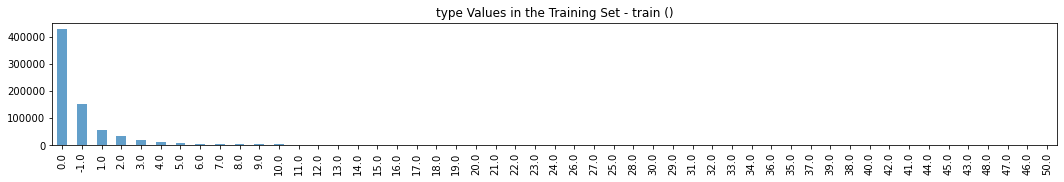

In [31]:
fig = plt.figure(figsize=(18,9))
plt.subplots_adjust(hspace=.5)

plt.subplot2grid((3,3), (0,0), colspan = 3)
train_quality['quality_5'].value_counts()[:50].plot(kind='bar', alpha=0.7)
plt.title('type Values in the Training Set - train ()')

## ㅠㅠ 여기까지밖에 못했습니다